## Loading Data(cats vs dogs) from kaggle

In [14]:
#!rm -f ~/.kaggle
#!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [20]:
#!/bin/bash
!kaggle datasets download salader/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
 97% 1.03G/1.06G [00:12<00:00, 270MB/s]
100% 1.06G/1.06G [00:12<00:00, 88.8MB/s]


In [ ]:
!unzip dogsvscats.zip -d /content/dogsvscats/

# To read the data from directory

In [29]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# os.listdir('/content/dogsvscats/train/dogs')
random.sample(os.listdir('/content/dogsvscats/train/dogs'), 5)

['dog.6772.jpg',
 'dog.8390.jpg',
 'dog.4845.jpg',
 'dog.9802.jpg',
 'dog.9607.jpg']

In [30]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
    image_filenames = os.listdir(directory_path) # List of names

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select num_images
    selected_images = random.sample(image_filenames, num_images)


    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Plotting the images
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

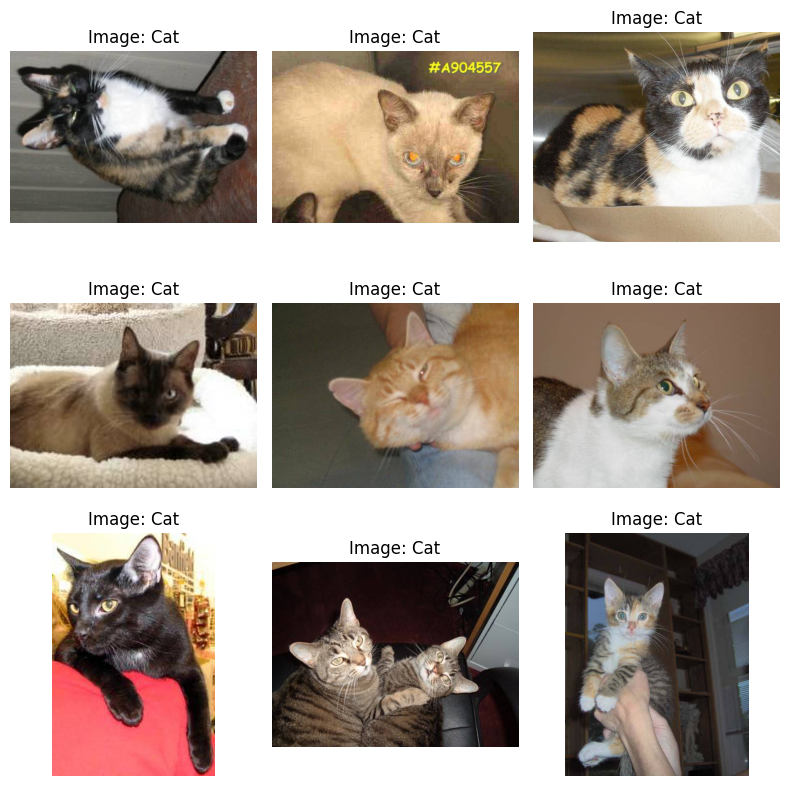

In [31]:
plot_images_from_directory('/content/catsvsdogs/train/cats',class_animal = 'Cat')

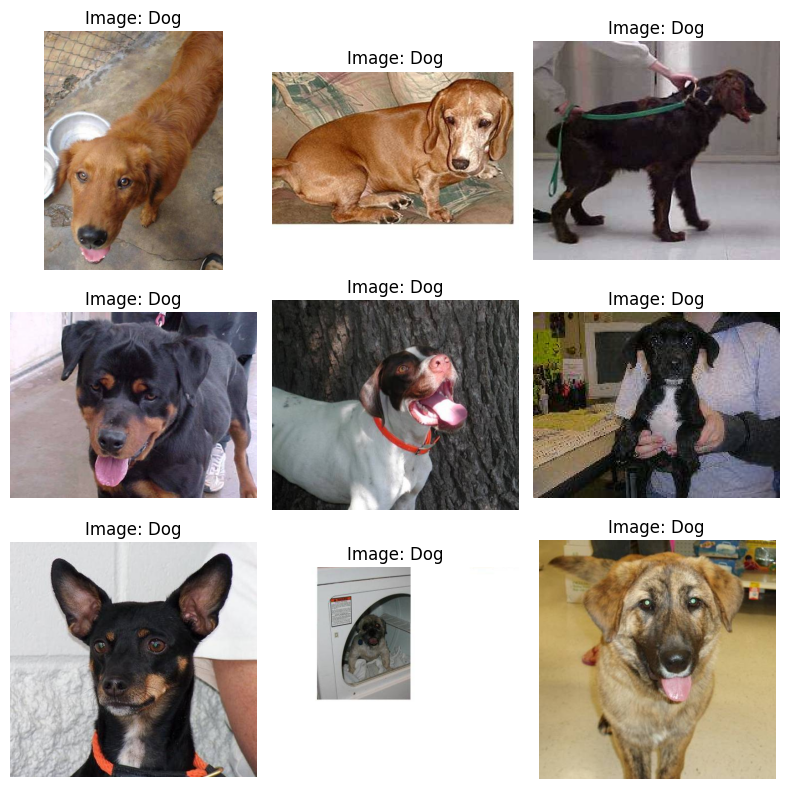

In [32]:
plot_images_from_directory('/content/catsvsdogs/train/dogs',class_animal = 'Dog')

In [40]:
# Total Cat and Dog images:
cat_images = '/content/catsvsdogs/train/cats'
dog_images = '/content/catsvsdogs/train/dogs'
cat_images=os.listdir(cat_images)
dog_images = os.listdir(dog_images)
c=[len(cat_images),len(dog_images)]
c                                             # balanced data

[10000, 10000]

# Plotting data to visualize distribution between both classes

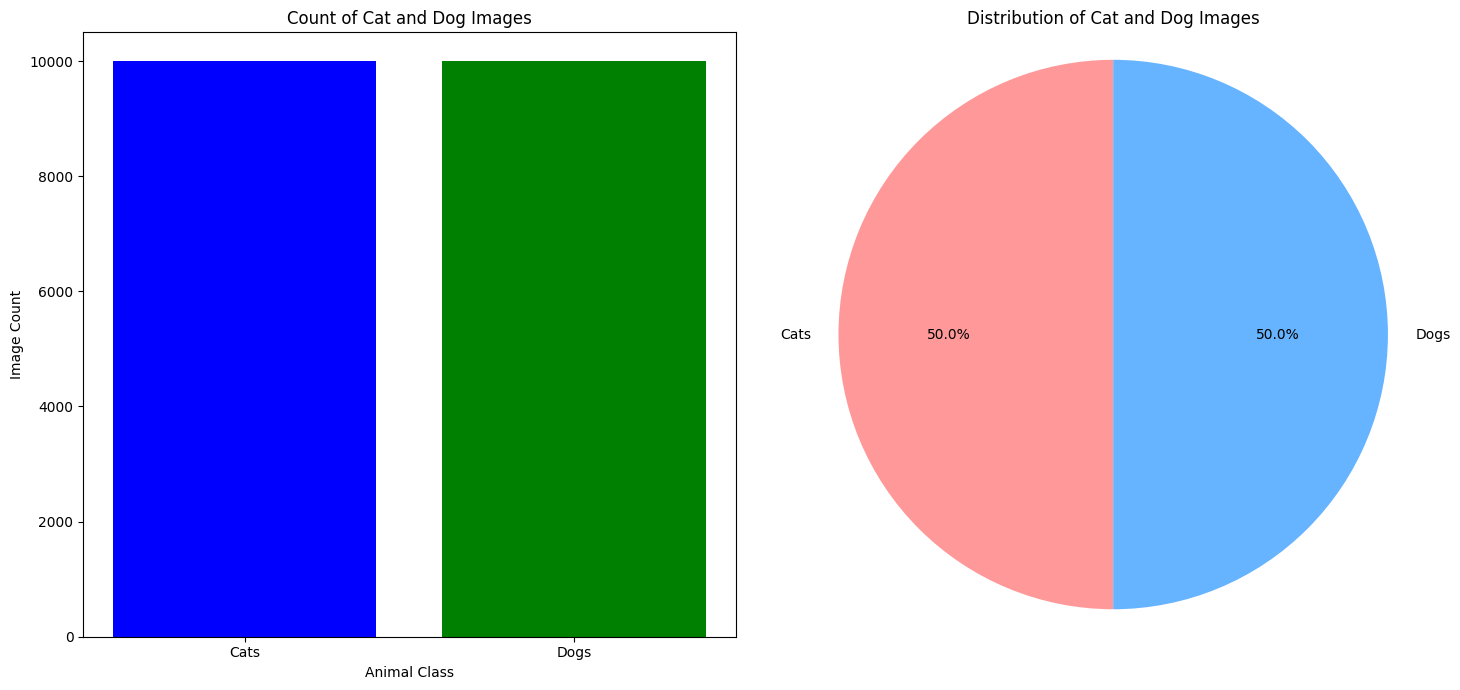

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
classes_animals=["Cats","Dogs"]
# Bar chart
ax[0].bar(classes_animals, c, color=['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')

# Pie chart
colors = ['#ff9999','#66b3ff']
ax[1].pie(c, labels=classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

In [41]:
import os
import cv2
import imghdr

#acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']


data_dir = '/content/dogsvscats'
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # adding the path and file name to create an absolute path
        file_path = os.path.join(root, file)

        try:
            file_type = imghdr.what(file_path) # Checking file type

            if file_type not in image_exts:
                print(f'Image not in acceptable extension {file_path}')
                os.remove(file_path) # if not exists? remove
            else:
                # reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            print(f'Issue with file {file_path}. Error: {e}')
            os.remove(file_path) # if unable to read the image then it is removed again

/tmp/ipython-input-342257356.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# image into numpy arrays

In [42]:
import numpy as np
from PIL import Image

def image_to_array(image_path):
    try:
        with Image.open(image_path) as img:
            image_array = np.array(img)
            return image_array
    except IOError:
        print(f"Could not read the image file at {image_path}.")
        return None

array([[[238, 224, 211],
        [169, 153, 137],
        [139, 116,  98],
        ...,
        [133, 102,  82],
        [128,  97,  77],
        [127,  96,  76]],

       [[250, 234, 219],
        [173, 154, 137],
        [133, 108,  86],
        ...,
        [115,  84,  64],
        [111,  80,  59],
        [110,  79,  59]],

       [[248, 230, 210],
        [170, 148, 127],
        [129, 101,  77],
        ...,
        [ 85,  54,  33],
        [ 83,  53,  29],
        [ 84,  53,  32]],

       ...,

       [[255, 255, 244],
        [254, 255, 241],
        [252, 250, 237],
        ...,
        [239, 240, 224],
        [238, 239, 223],
        [238, 239, 223]],

       [[255, 255, 244],
        [255, 255, 242],
        [252, 253, 239],
        ...,
        [245, 246, 232],
        [244, 245, 231],
        [244, 245, 231]],

       [[255, 255, 244],
        [255, 255, 243],
        [254, 255, 241],
        ...,
        [250, 251, 237],
        [248, 249, 235],
        [249, 250, 236]]], dtype=uint8)
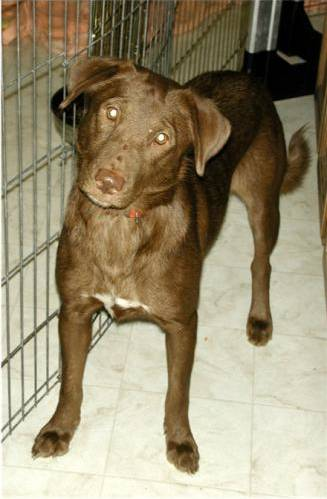

In [43]:
image_to_array('/content/dogsvscats/train/dogs/dog.1.jpg')



### ImageGenerator : can be used to define number of images at once, validation split, shape of the image(resizing)


ImageGEN: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator





In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training Model

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [50]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # pixel values from 0 to 255 will be rescaled to 1./255
base_dir = '/content/dogsvscats/train/'

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
